Title with the highest average salary: Software Engineering Manager
Average salary: 329332.03125


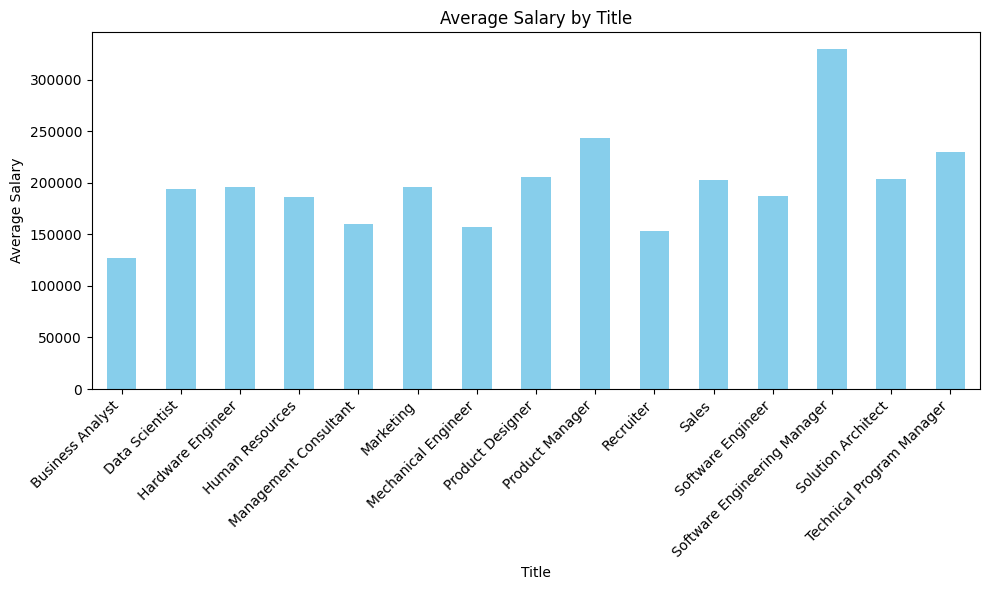

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import autograd.numpy as np
from autograd import grad

# Numerical/scientific computing packages.
import scipy
import copy
import seaborn as sns
import csv

# Machine learning package.
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, mean_absolute_error

# Useful for saving our models.
import pickle

# Plotting packages.
import matplotlib
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

print("Imported all!")

Imported all!


In [2]:
file_path = 'techSalaries2017.csv'

df = pd.read_csv(file_path)
print("Size before dropping: ", df.size)
print(df.isnull().sum())
for i, column_name in enumerate(df.columns.values.tolist()):
    print("index:", str(i) + ";", "spec num:", str(i+1) + ";", "df['{}']".format(column_name))

Size before dropping:  1691334
company                        5
title                          0
location                       0
totalyearlycompensation        0
basesalary                     0
stockgrantvalue                0
bonus                          0
yearsofexperience              0
yearsatcompany                 0
gender                     19540
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       40215
Education                  32272
Age                            0
Height                         0
Zodiac                         0
SAT                            0
GPA                            0
dtype: int64
index: 0; spec num: 1; df['company']
index: 1; spec num: 2; df['t

In [3]:
# drop columns we are not using for the predictions
columns_to_drop = ['company', 'title', 'location']

for column in columns_to_drop:
    df = df.drop(column, axis=1)
    print("\nRemoving '{}' column from the prediction data".format(column))


# create a dataset for the total_yearly_compensation_prediction by removing `basesalary`, `stockgrantvalue`, `bonus` columns cause they dulpicate the information
new_columns_to_drop = ['basesalary', 'stockgrantvalue', 'bonus']
for column in new_columns_to_drop:
    df = df.drop(column, axis=1)
    print("\nRemoving '{}' column from the dataset for total_yearly_compensation prediction".format(column))

df.head()


Removing 'company' column from the prediction data

Removing 'title' column from the prediction data

Removing 'location' column from the prediction data

Removing 'basesalary' column from the dataset for total_yearly_compensation prediction

Removing 'stockgrantvalue' column from the dataset for total_yearly_compensation prediction

Removing 'bonus' column from the dataset for total_yearly_compensation prediction


,totalyearlycompensation,yearsofexperience,yearsatcompany,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,...,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,Age,Height,Zodiac,SAT,GPA
0,127000,1.5,1.5,NaN,0,0,0,0,0,0,...,0,0,0,NaN,NaN,38,68.590,5,829,2.13
1,100000,5.0,3.0,NaN,0,0,0,0,0,0,...,0,0,0,NaN,NaN,34,68.059,7,993,2.77
2,310000,8.0,0.0,NaN,0,0,0,0,0,0,...,0,0,0,NaN,NaN,42,61.343,3,1200,3.26
3,372000,7.0,5.0,NaN,0,0,0,0,0,0,...,0,0,0,NaN,NaN,28,66.495,3,1170,3.07
4,157000,5.0,3.0,NaN,0,0,0,0,0,0,...,0,0,0,NaN,NaN,34,69.015,2,1115,2.91


In [4]:
def return_shape(df):
    return "Rows: " + str(df.shape[0]) + "; Columns: " + str(df.shape[1])

print(return_shape(df))

Rows: 62642; Columns: 21


In [19]:
# let's drop all the columns that contain incomplete information about person's race or education cause we can't meaningfully use them for our model
new_df = df.dropna()
print(return_shape(new_df))
print("-----------------------------------")
new_df.isnull().sum()

Rows: 21591; Columns: 21
-----------------------------------


totalyearlycompensation    0
yearsofexperience          0
yearsatcompany             0
gender                     0
Masters_Degree             0
Bachelors_Degree           0
Doctorate_Degree           0
Highschool                 0
Some_College               0
Race_Asian                 0
Race_White                 0
Race_Two_Or_More           0
Race_Black                 0
Race_Hispanic              0
Race                       0
Education                  0
Age                        0
Height                     0
Zodiac                     0
SAT                        0
GPA                        0
dtype: int64

In [22]:
# let's leave one dummy variable out for the education 
# df = new_df.drop("Doctorate_Degree", axis=1)

# Combine the 5 columns into a single predictor using one-hot encoding with drop_first
educational_level = pd.get_dummies(new_df[['Masters_Degree', "Bachelors_Degree", 'Doctorate_Degree', 'Highschool', 'Some_College']], drop_first=True)
# Let's manually drop one of the columns
educational_level = educational_level.drop(columns=['Masters_Degree'])

# First we need to combine the race columns into a single predictor using one-hot encoding
race = pd.get_dummies(new_df[['Race_Asian', "Race_White", 'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic']])
race = race.drop(columns=['Race_Asian'])

print(return_shape(new_df))
race.reset_index(drop=True, inplace=True)
educational_level.reset_index(drop=True, inplace=True)
new_df.head()
# new_df.isnull().sum()

Rows: 21591; Columns: 21


,totalyearlycompensation,yearsofexperience,yearsatcompany,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,...,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,Age,Height,Zodiac,SAT,GPA
15710,400000,5.0,5.0,Male,0,0,1,0,0,1,...,0,0,0,Asian,PhD,45,68.891,9,1166,3.04
23532,136000,3.0,2.0,Male,0,1,0,0,0,0,...,1,0,0,Two Or More,Bachelor's Degree,24,61.454,12,1175,3.07
23533,337000,6.0,6.0,Male,0,1,0,0,0,1,...,0,0,0,Asian,Bachelor's Degree,25,65.455,1,1268,3.34
23534,222000,4.0,4.0,Male,1,0,0,0,0,1,...,0,0,0,Asian,Master's Degree,32,73.769,8,1070,2.75
23535,187000,5.0,0.0,Male,0,1,0,0,0,0,...,0,0,0,White,Bachelor's Degree,29,68.710,2,1187,3.23


In [7]:
def plot_linear_regression(predictor, outcome, title="", xlab="", ylab=""):
    """
    Takes two different columns: predictor and the outcome, and then returns a matplotlib plot of the LinearRegression using sklearn + 
    r2_score of it
    """
    # # Reshape predictor and outcome columns to numpy arrays
    # predictor = predictor_col.iloc[1:, 0].values.reshape(-1, 0)  # values converts it into a numpy array
    # outcome = outcome_col.iloc[1:, 0].values.reshape(-1, 0) 
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(predictor, outcome)
    
    # Make predictions
    predictions = model.predict(predictor)

    # Calculate R^2 score
    r2 = r2_score(outcome, predictions)
    
    # Plot the data points and the regression line
    plt.scatter(predictor, outcome, s=7, alpha=0.1, color="#00b4c5")
    plt.plot(predictor, predictions, color='#c44601')
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    # plt.legend()
    
    # Display R^2 score, betas, and intercept
    plt.text(0.95, 0.95, f'R^2 = {r2:.2f}', ha='right', va='top', transform=plt.gca().transAxes)
    plt.text(0.95, 0.90, f'Beta 0 (Intercept) = {model.intercept_[0]:.2f}', ha='right', va='top', transform=plt.gca().transAxes)
    plt.text(0.95, 0.85, f'Beta 1 = {model.coef_[0][0]:.2f}', ha='right', va='top', transform=plt.gca().transAxes)
    
    # Show the plot
    plt.show()


### QUESTION 1: Using multiple linear regression: What is the best predictor of total annual compensation, how much variance is explained by this predictor vs. the full multiple regression model?

In [8]:
import matplotlib.pyplot as plt

def scatter_plot(ax, predictor, outcome, title):
    ax.scatter(predictor, outcome, s=7, alpha=0.1, color="orange")
    ax.set_title(f"{title} vs annual compensation")
    ax.set_xlabel(title)
    ax.set_ylabel("total annual compensation")


def plot_scatter(data, header, outcome_variable):
    indices = [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0)]
    fig, axs = plt.subplots(3, 2, figsize=(12, 8))

    for i, name in zip(indices, header):
        scatter_plot(axs[i[0], i[1]], data[name], outcome_variable, name)

In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Concatenate GPA and SAT into a DataFrame before fitting the scaler
data = pd.DataFrame(
    {'GPA': df['GPA'], 
     'SAT': df['SAT'],
     'yearsofexperience': df['yearsofexperience'],
     'yearsatcompany': df['yearsatcompany'],
     'Age': df['Age'],
     'Height': df['Height']
    })
standardizer = StandardScaler()
standardized_data = standardizer.fit_transform(data)
# Convert the standardized data back into a DataFrame
# NOTE: standardized data preserves the distribution!
standardized_predictors_df = pd.DataFrame(standardized_data, columns=['GPA_standard', 'SAT_standard', 'Yrs_of_exp_stand', 'Yrs_at_company_stand', 'Age_stand', 'Height_stand'])
print(return_shape(standardized_predictors_df))

Rows: 62642; Columns: 6


In [10]:
normalizer = MinMaxScaler()
normalized_data = normalizer.fit_transform(data)
normalized_predictors_df = pd.DataFrame(normalized_data, columns=['GPA_norm', 'SAT_norm', 'Yrs_of_exp_norm', 'Yrs_at_company_norm', 'Age_norm', 'Height_norm'])

gpa_sat_norm_df = normalized_predictors_df.iloc[:, :2]
print(return_shape(gpa_sat_norm_df))

Rows: 62642; Columns: 2


In [11]:
# We want to plot these values to identify what are the most useful predictors
predictors_list_and_outcome = ['GPA', 'SAT', 'yearsofexperience', 'yearsatcompany', 'Age', 'Height', 'totalyearlycompensation']
new_predictors_df = df[predictors_list_and_outcome]
list_of_predictors = df[predictors_list_and_outcome].columns.tolist()

age_related_predictors_norm_df  = new_predictors_df.iloc[:, 2:5]
print(return_shape(age_related_predictors_norm_df))

Rows: 62642; Columns: 3


In [12]:
outcome_variable = new_predictors_df.iloc[0:, 6].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
len(outcome_variable)

62642

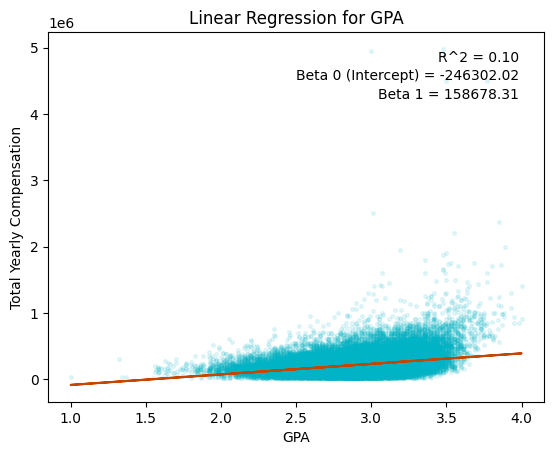

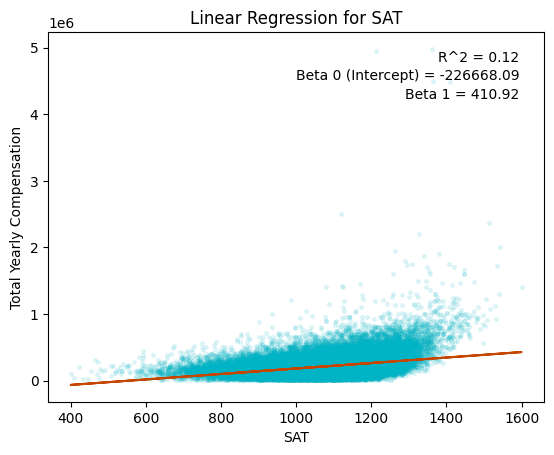

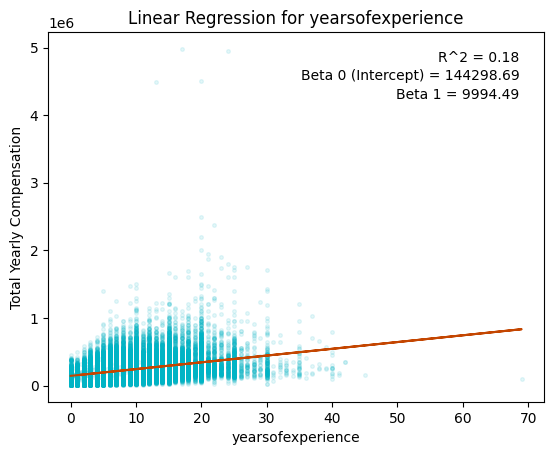

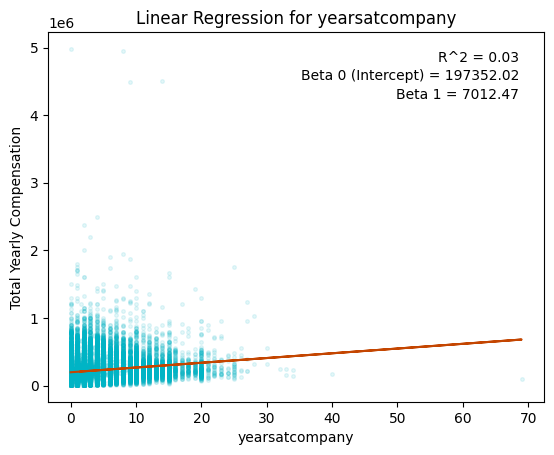

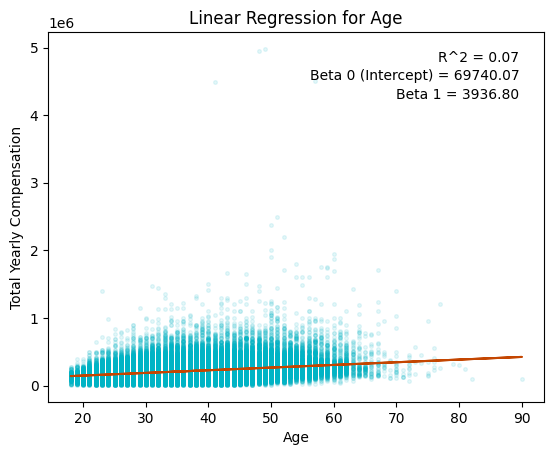

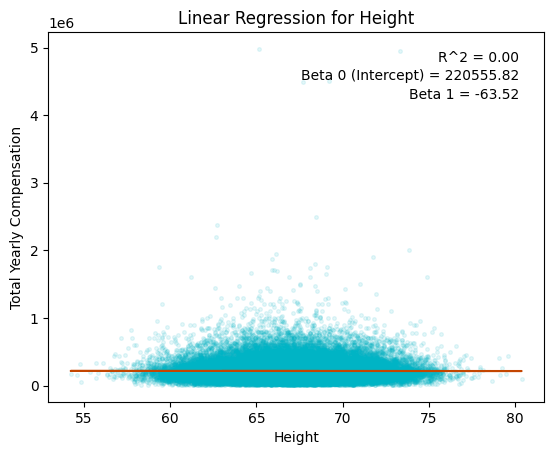

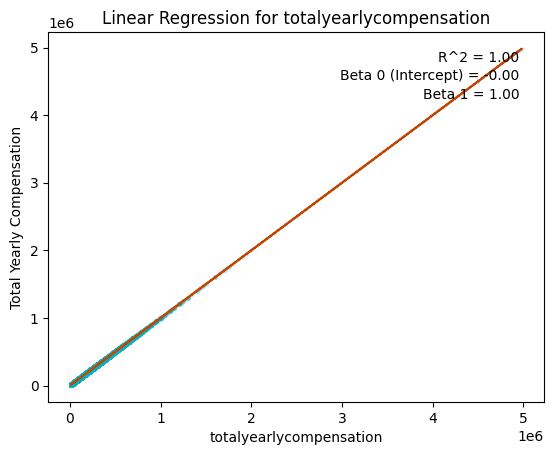

In [13]:
for i, predictor_name in enumerate(list_of_predictors):
    # Select predictor column as DataFrame
    X = new_predictors_df.iloc[0:, i].values.reshape(-1, 1)
    plot_linear_regression(X, outcome_variable, title=f"Linear Regression for {predictor_name}", xlab=predictor_name, ylab="Total Yearly Compensation")

### Standardization is often used when dealing with variables that have different scales, such as age, salary, and height

In [14]:
def plot_freq_dist(predictor, dataframe, color: str = "red", title = "N/A"):
    """
    data: 1d dataframe to plot on the graph
    """
    data = dataframe[predictor]
    data_size = data.shape[0]
    # Let's use the Scott's rule for choosing the right bin width
    w = 3.49 * np.std(data)/data_size**(1./3)

    # define number of bins with accordance to the appropriate size 
    bins = np.arange(data.min().item(), data.max().item() + w, w, dtype=float)

    plt.hist(data, edgecolor=color, bins=bins) 
    plt.xlabel("{} distribution".format(title))  # Set x-axis label
    plt.ylabel("frequency")     # Set y-axis label
    plt.show()  # Show the plot

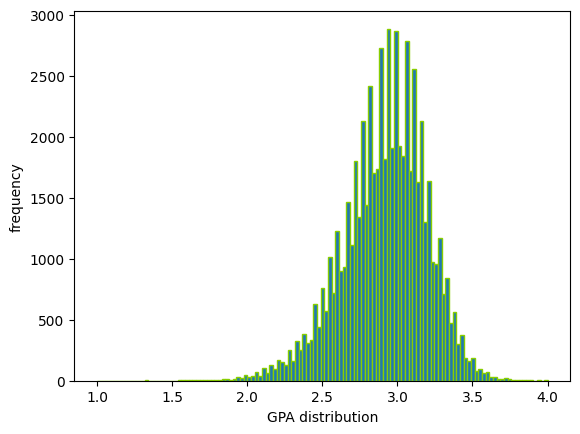

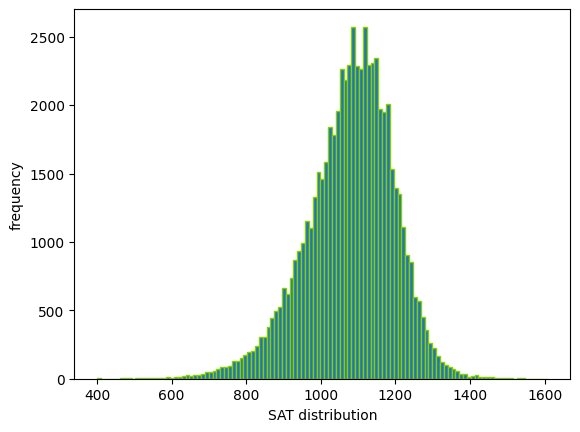

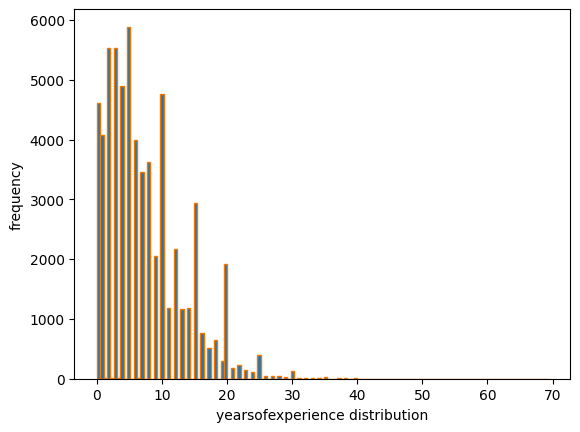

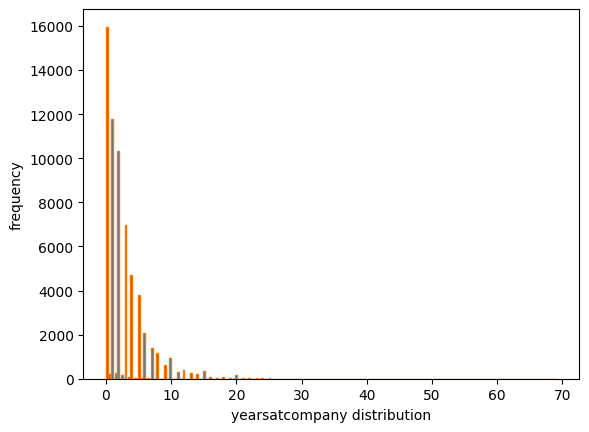

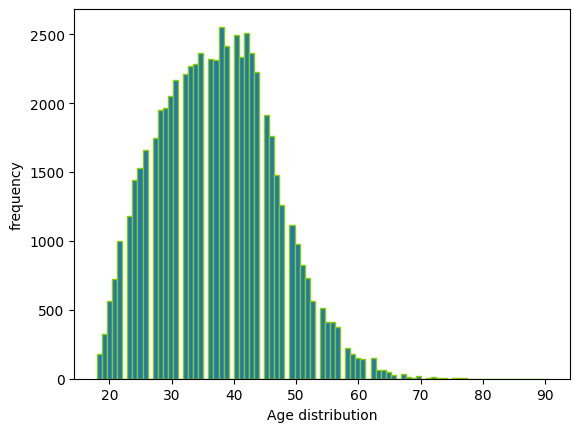

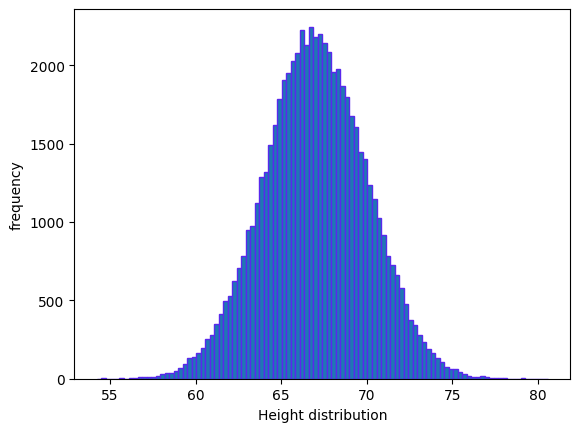

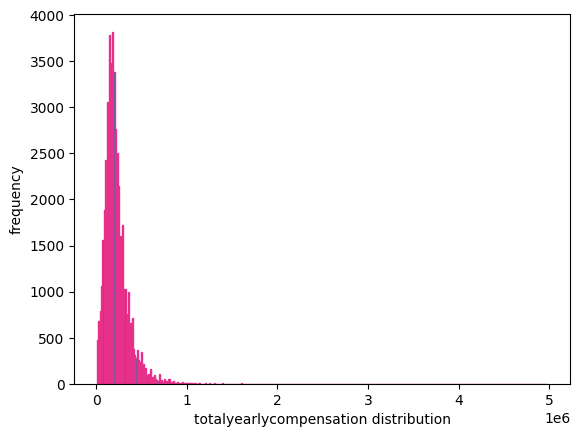

In [15]:
import random

# List of color codes
color_codes = ['#f57600', '#8babf1', '#89ce00', '#e6308a', '#5928ed']

for predictor in new_predictors_df:
    plot_freq_dist(predictor, new_predictors_df, color = random.choice(color_codes), title = predictor)

In [16]:



def multiple_linear_regression(predictors, outcome, normalized=None):
    """
    normalized=None --> takes raw variables and trains the model based on them
    normalized=True --> normalizes ALL predictor variables
    normalized=False --> standardizes ALL predictor variables
    """
    X = predictors
    y = outcome

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

    # Normalizing features
    standardizer = StandardScaler()
    normalizer = MinMaxScaler()
    
    if normalized is None:
        # default case, we are just working with data as is
        X_train_scaled = X_train
        X_test_scaled = X_test
    
    elif normalized is not None and normalized == True: 
        # case where we want to normalize all the predictors
        X_train_scaled = normalizer.fit_transform(X_train)
        X_test_scaled = normalizer.transform(X_test)

    elif normalized is not None and normalized == False:
        # case where we want to standardize all the predictors
        X_train_scaled = standardizer.fit_transform(X_train)
        X_test_scaled = standardizer.transform(X_test)
        
    # Fit linear regression model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    # Generate predictions
    y_pred = model.predict(X_test_scaled)

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Return relevant statistics
    return {
        "coefficients": model.coef_,
        "intercept": model.intercept_,
        "r2_score": r2,
        "rmse": rmse
    }


def output_multiple_regression_results(results):
    """
    results = multiple_linear_regression(new_predictors_df, Y)
    """
    print('\n\n\n')
    print("\nSTARTING A NEW REPORT!!!")
    print("--------------------------------------------")
    print("Intercept: ", results["intercept"])
    print("--------------------------------------------")
    for i, ii in enumerate(results['coefficients']):
        print("Beta {}: ".format(i+1), ii)
    print("--------------------------------------------")
    print("R^2 Score: ", results["r2_score"])
    print("--------------------------------------------")
    print("RMSE: ", results["rmse"])
    print("--------------------------------------------")
    print("END OF THE REPORT\n")
    print('\n\n\n')



In [18]:

prepared_dataset = pd.concat(
    [
        gpa_sat_norm_df["GPA_norm"], 
        gpa_sat_norm_df["SAT_norm"], 
        standardized_predictors_df["Yrs_of_exp_stand"],
        standardized_predictors_df["Yrs_at_company_stand"],
        standardized_predictors_df["Age_stand"]
    ],
    axis=1)

prepared_dataset = pd.concat([prepared_dataset, race, educational_level], axis=1)

print("-----------------------------------")
print(prepared_dataset.isnull().sum())
print("-----------------------------------")
prepared_dataset.reset_index(drop=True, inplace=True)
predictors = new_predictors_df.iloc[0:, 0:5]

tests_normalized_ages_standardized_model = multiple_linear_regression(prepared_dataset, outcome_variable)
all_normalized_model = multiple_linear_regression(predictors, outcome_variable, normalized = True)
all_standardized_model = multiple_linear_regression(predictors, outcome_variable, normalized = False)

print("We have normalized GPAs and SATs and standardized Yrs of experience and Yrs at the company as well as Age for this one:")
output_multiple_regression_results(tests_normalized_ages_standardized_model)

print("All predictors normalized: ")
output_multiple_regression_results(all_normalized_model)

print("All predictors are standardized: ")
output_multiple_regression_results(all_standardized_model)


######################################################################################################
######################################################################################################
######################################################################################################
######################################################################################################

standardized_outcome_variable = standardizer.fit_transform(outcome_variable)

tests_normalized_ages_standardized_model = multiple_linear_regression(prepared_dataset, standardized_outcome_variable)
all_normalized_model = multiple_linear_regression(predictors, standardized_outcome_variable, normalized = True)
all_standardized_model = multiple_linear_regression(predictors, standardized_outcome_variable, normalized = False)

print("We have normalized GPAs and SATs and standardized Yrs of experience and Yrs at the company as well as Age for this one:")
output_multiple_regression_results(tests_normalized_ages_standardized_model)

print("All predictors normalized: ")
output_multiple_regression_results(all_normalized_model)

print("All predictors are standardized: ")
output_multiple_regression_results(all_standardized_model)


-----------------------------------
GPA_norm                    0
SAT_norm                    0
Yrs_of_exp_stand            0
Yrs_at_company_stand        0
Age_stand                   0
Race_White              41051
Race_Two_Or_More        41051
Race_Black              41051
Race_Hispanic           41051
Bachelors_Degree        41051
Doctorate_Degree        41051
Highschool              41051
Some_College            41051
dtype: int64
-----------------------------------


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

### QUESTION 2: Using ridge regression to do the same as in 1): How does the model change or improvecompared to OLS? What is the optimal lambda?

prepared_dataset - dataset that 

In [ ]:
new_predictors_df.head()
len(new_predictors_df["totalyearlycompensation"])

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

new_predictors_df.reset_index(drop=True, inplace=True)

total_yearly_compensation_df = pd.DataFrame({"compensation": standardized_outcome_variable.flatten()})
total_yearly_compensation_df.reset_index(drop=True, inplace=True)

intermediate_dataset = pd.concat(
    [
        prepared_dataset["GPA_norm"], 
        prepared_dataset["SAT_norm"], 
        prepared_dataset["Yrs_of_exp_stand"],
        prepared_dataset["Yrs_at_company_stand"],
        prepared_dataset["Age_stand"],
    ],
    axis=1)

stacked_df = intermediate_dataset.join([total_yearly_compensation_df])
stacked_df.reset_index(drop=True, inplace=True)


# having all the predictors in a way we want then + outcome varible at the very end
stacked_df.reset_index(drop=True, inplace=True)


def single_ridge_regression(predictor, outcome):
    xTrain, xTest, yTrain, yTest = train_test_split(predictor, outcome, test_size=0.2, random_state=21)
    lambdas = np.linspace(0.01,15,401)
    cont = np.empty([len(lambdas),2])*np.NaN # [lambda error]
    for ii in range(len(lambdas)):
        ridgeModel = Ridge(alpha=lambdas[ii]).fit(xTrain, yTrain)
        cont[ii,0] = lambdas[ii]
        error = mean_squared_error(yTest,ridgeModel.predict(xTest),squared=False)
        cont[ii,1] = error
    
    plt.plot(cont[:,0],cont[:,1])
    plt.xlabel('Lambda')
    plt.ylabel('RMSE')
    plt.title('Ridge regression')
    plt.show()
    print('Optimal lambda:',lambdas[np.argmax(cont[:,1]==np.min(cont[:,1]))])

import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')
  
def multiple_ridge_regression(dataframe=stacked_df):
    X = dataframe.iloc[0:, 0:5].values
    y = dataframe.iloc[0:, 5].values
    print(y)
    
    # Split data into training and testing sets
    xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=21)
    
    lambdas = np.linspace(0.01,15,401)
    cont = np.empty([len(lambdas),2])*np.NaN # [lambda error]
    for ii in range(len(lambdas)):
        ridgeModel = Ridge(alpha=lambdas[ii]).fit(xTrain, yTrain)
        cont[ii,0] = lambdas[ii]
        error = mean_squared_error(yTest,ridgeModel.predict(xTest),squared=False)
        cont[ii,1] = error
    
    plt.plot(cont[:,0],cont[:,1])
    plt.xlabel('Lambda')
    plt.ylabel('RMSE')
    plt.title('Ridge regression')
    plt.show()
    print('Optimal lambda:',lambdas[np.argmax(cont[:,1]==np.min(cont[:,1]))])

multiple_ridge_regression(stacked_df)

In [ ]:
def single_ridge_regression(predictor, outcome):
    # Reshape predictor and outcome arrays to have a single feature
    predictor = predictor.reshape(-1, 1)
    outcome = outcome.reshape(-1, 1)

    xTrain, xTest, yTrain, yTest = train_test_split(predictor, outcome, test_size=0.2, random_state=21)
    lambdas = np.linspace(0.01, 15, 401)
    cont = np.empty([len(lambdas), 2]) * np.NaN  # [lambda error]
    for ii in range(len(lambdas)):
        ridgeModel = Ridge(alpha=lambdas[ii]).fit(xTrain, yTrain)
        cont[ii, 0] = lambdas[ii]
        error = mean_squared_error(yTest, ridgeModel.predict(xTest), squared=False)
        cont[ii, 1] = error
    
    plt.plot(cont[:, 0], cont[:, 1])
    plt.xlabel('Lambda')
    plt.ylabel('RMSE')
    plt.title('Name of the predictor')
    plt.show()
    optimal_lambda = lambdas[np.argmin(cont[:, 1])]
    print('Optimal lambda:', optimal_lambda)

# Loop over each column in stacked_df for regression
for i in range(5):
    single_ridge_regression(stacked_df.iloc[:, i].values.flatten(), outcome=stacked_df.iloc[:, 5].values.flatten())

In [ ]:
from sklearn.model_selection import KFold

def ridge_regression_cv(predictor, outcome, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=21)
    lambdas = np.linspace(0.01, 15, 201)
    avg_rmse = []
    all_rmse = []

    for train_index, test_index in kf.split(predictor):
        xTrain, xTest = predictor[train_index], predictor[test_index]
        yTrain, yTest = outcome[train_index], outcome[test_index]

        cont = np.empty([len(lambdas), 2]) * np.NaN  # [lambda error]
        for i, alpha in enumerate(lambdas):
            ridgeModel = Ridge(alpha=alpha).fit(xTrain, yTrain)
            error = mean_squared_error(yTest, ridgeModel.predict(xTest), squared=False)
            cont[i, 0] = alpha
            cont[i, 1] = error
        
        optimal_lambda = lambdas[np.argmin(cont[:, 1])]
        avg_rmse.append(np.min(cont[:, 1]))
        all_rmse.append(cont[:, 1])
    
    avg_rmse = np.mean(avg_rmse)
    print('Average RMSE across all folds:', avg_rmse)

    # Plot RMSE for each fold
    for i, rmse_fold in enumerate(all_rmse):
        plt.plot(lambdas, rmse_fold, label=f'Fold {i+1}')

    plt.xlabel('Lambda')
    plt.ylabel('RMSE')
    plt.title('Ridge Regression Cross-Validation')
    plt.legend()
    plt.show()

# Loop over each column in stacked_df for regression
for i in range(5):
    predictor = stacked_df.iloc[:, i].values.reshape(-1, 1)
    outcome = stacked_df.iloc[:, 5].values
    ridge_regression_cv(predictor, outcome, n_splits=10)

In [ ]:
## Question 3: Using Lasso regression to do the same as in 1): How does the model change now? How many of the predictor betas are shrunk to exactly 0? What is the optimal lambda now?

In [ ]:
## Question 4: There is controversy as to the existence of a male/female gender pay gap in tech job compensation. Build a logistic regression model (with gender as the outcome variable) to see if there is an appreciable beta associated with total annual compensation with and without controlling for other factors. 

In [ ]:
## Question 5: Build a logistic regression model to see if you can predict high and low pay from years of relevant experience, age, height, SAT score and GPA, respectively.